## 1. Install and import liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import os

## 2. Load data from csv and API

In [25]:
path = "Additional files"
df = pd.read_csv(os.path.join(path, 'dialect_dataset_fetched.csv'))
df

,id,dialect,text,word_count,char_count
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,8,48
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,19,120
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,5,31
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,5,42
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,7,34
...,...,...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,5,37
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,6,44
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,14,73
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,6,43


## 4. Preprocess

### Remove mentions, hashtags, URLs, and punctuations

In [6]:
x = df.loc[0].text

In [7]:
x

'@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .'

In [8]:
x

'@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .'

In [9]:
' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)|[\.\,\!\?\:\;\-\=\"\']","",x).split())

'لكن بالنهاية ينتفض يغير'

### Remove punctuations

In [10]:
' '.join(re.sub("[\.\,\!\?\:\;\-\=\"\']", " ", x).split())

'@Nw8ieJUwaCAAreT لكن بالنهاية ينتفض يغير'

### Remove emoji

In [11]:
y = df.loc[3].text
y

'@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐'

In [12]:
' '.join(re.sub("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+","",y).split())

'@HAIDER76128900 يسلملي مرورك وروحك الحلوه'

## Apply preprocessing

In [13]:
def remove_tags_urls(string):
    return ' '.join(re.sub("(@[A-Za-z0-9-_]+)|(#[A-Za-z0-9]+)|(\w+:\/\/\S+)","", string).split())

In [14]:
def remove_punc(string):
    return ' '.join(re.sub("[\.\,\!\?\:\;\-\=\"\'\_]","", string).split())

In [15]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [26]:
def finalpreprocess(string_):
    string_ = remove_tags_urls(string_)
    string_ = remove_punc(string_)
    return remove_emojis(string_)

df['clean_text'] = df['text'].apply(lambda x: finalpreprocess(x))
df

,id,dialect,text,word_count,char_count,clean_text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,8,48,لكن بالنهاية ينتفض يغير
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,19,120,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,5,31,مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,5,42,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,7,34,وين هل الغيبه اخ محمد
...,...,...,...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,5,37,مبسوطين منك اللي باسطانا
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,6,44,والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,14,73,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,6,43,الله يبارك فيها وبالعافيه


### Number of words in a tweet

In [27]:
df['clean_word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))
df

,id,dialect,text,word_count,char_count,clean_text,clean_word_count
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,8,48,لكن بالنهاية ينتفض يغير,4
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,19,120,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...,15
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,5,31,مبين من كلامه خليجي,4
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,5,42,يسلملي مرورك وروحك الحلوه,4
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,7,34,وين هل الغيبه اخ محمد,5
...,...,...,...,...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,5,37,مبسوطين منك اللي باسطانا,4
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,6,44,والله ماينده ابش يختي,4
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,14,73,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...,12
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,6,43,الله يبارك فيها وبالعافيه,4


In [22]:
dialects = set(df.dialect.values)
dialects

{'AE',
 'BH',
 'DZ',
 'EG',
 'IQ',
 'JO',
 'KW',
 'LB',
 'LY',
 'MA',
 'OM',
 'PL',
 'QA',
 'SA',
 'SD',
 'SY',
 'TN',
 'YE'}

In [23]:
NO_OF_CLASSES = len(dialects)

In [29]:
df.groupby('dialect')['clean_word_count'].mean()

dialect
AE    13.960450
BH    12.302297
DZ    12.728110
EG    14.921334
IQ    11.928567
JO    12.224526
KW    14.441711
LB    13.603976
LY    12.676293
MA    12.601092
OM    11.572557
PL    11.938274
QA    15.409958
SA    13.695438
SD    13.853817
SY    11.925933
TN    14.261627
YE    11.753400
Name: clean_word_count, dtype: float64

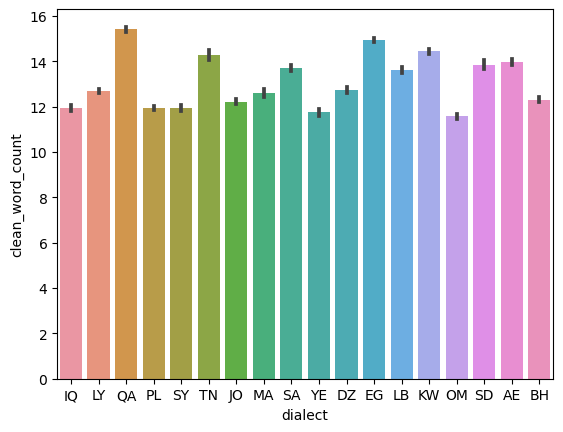

In [30]:
sns.barplot(x="dialect", y='clean_word_count', data=df)
plt.show()

### Number of Characters in a tweet

In [31]:
df['clean_char_count'] = df['clean_text'].apply(lambda x: len(str(x)))
df

,id,dialect,text,word_count,char_count,clean_text,clean_word_count,clean_char_count
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,8,48,لكن بالنهاية ينتفض يغير,4,23
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,19,120,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...,15,94
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,5,31,مبين من كلامه خليجي,4,19
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,5,42,يسلملي مرورك وروحك الحلوه,4,25
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,7,34,وين هل الغيبه اخ محمد,5,22
...,...,...,...,...,...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅,5,37,مبسوطين منك اللي باسطانا,4,24
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي,6,44,والله ماينده ابش يختي,4,21
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...,14,73,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...,12,59
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋,6,43,الله يبارك فيها وبالعافيه,4,26


In [32]:
MAX_SEQUENCE_LENGTH = df.clean_char_count.max()
MAX_SEQUENCE_LENGTH

285

### Save Dataframe to CSV

In [33]:
df.to_csv(os.path.join(path, 'dialect_dataset_pre-processed.csv'), index=False)